In [1]:
import pandas as pd
import numpy as np

xls = pd.ExcelFile('cleandataset.xlsx')

df1 = pd.read_excel(xls, 'nonxtb')
df2 = pd.read_excel(xls, 'xtb')

print(df1.columns)
print(df2.columns)

Index(['Unnamed: 0', 'Gexp', 'DEmFMO2', 'F2LE', 'PIEmFMO2', 'FE2', 'PIEmFMO3',
       'FE3', 'mTDS', 'numbtors', 'HIEmligand', 'HIEligandE', 'logP'],
      dtype='object')
Index(['Unnamed: 0', 'Gexp', 'DG', 'LE', 'HIEmligand', 'logP'], dtype='object')


In [2]:
from sklearn import linear_model
from sklearn import metrics
from matplotlib import pyplot

def magnify():
    
    return [dict(selector="th",
                 props=[("font-size", "12pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '400px'),
                        ('font-size', '12pt')])]


def get_lr_model (featlist, label, df):

     x = df[featlist].values
     y = df[label].values

     #print(x.shape)
     #print(y.shape)
 
     # with sklearn
     regr = linear_model.LinearRegression()
     regr.fit(x, y)

     y_pred = regr.predict(x)

     """
     y_pred = []
     for idx, xval in enumerate(x):
          ypred = regr.intercept_
          for i, xi in enumerate(xval):
               ypred += xi*regr.coef_[i]
          y_pred.append(ypred)
     """

     mse = metrics.mean_squared_error (y, y_pred)
     r2 = metrics.r2_score (y, y_pred)

     return y, y_pred, regr, mse, r2

def print_and_plot(y, y_pred, regr, mse, r2):
     
     print('Intercept: \n', regr.intercept_)
     for idx, f in enumerate(featlist):
           print("Coeff %10s %10.4f "%(f,regr.coef_ [idx]))

     print("MSE: %10.5f R2: %10.5f"%(mse, r2))

     pyplot.scatter(y, y_pred)
     pyplot.xlabel("True Values")
     pyplot.ylabel("Predicted Values")
     pyplot.show()

In [3]:
import seaborn as sns
%matplotlib inline

# calculate the correlation matrix
corr = df1.corr()

cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)
corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '100px', 'font-size': '12pt'})\
    .set_caption("Correlation")\
    .set_precision(2)\
    .set_table_styles(magnify())

,Gexp,DEmFMO2,F2LE,PIEmFMO2,FE2,PIEmFMO3,FE3,mTDS,numbtors,HIEmligand,HIEligandE,logP
Gexp,1.00,-0.40,-0.51,0.34,-0.50,0.37,-0.49,-0.19,-0.11,0.41,-0.14,0.21
DEmFMO2,-0.40,1.00,0.98,0.70,0.86,0.69,0.86,0.04,0.44,0.14,0.67,0.18
F2LE,-0.51,0.98,1.00,0.58,0.93,0.56,0.93,0.02,0.50,0.08,0.73,0.08
PIEmFMO2,0.34,0.70,0.58,1.00,0.41,1.00,0.42,-0.03,0.19,0.45,0.40,0.49
FE2,-0.50,0.86,0.93,0.41,1.00,0.40,1.00,-0.00,0.63,0.18,0.85,-0.06
PIEmFMO3,0.37,0.69,0.56,1.00,0.40,1.00,0.41,-0.01,0.24,0.43,0.41,0.50
FE3,-0.49,0.86,0.93,0.42,1.00,0.41,1.00,0.02,0.66,0.17,0.87,-0.05
mTDS,-0.19,0.04,0.02,-0.03,-0.00,-0.01,0.02,1.00,0.10,0.07,-0.14,0.33
numbtors,-0.11,0.44,0.50,0.19,0.63,0.24,0.66,0.10,1.00,0.13,0.84,-0.10
HIEmligand,0.41,0.14,0.08,0.45,0.18,0.43,0.17,0.07,0.13,1.00,0.34,-0.03


Intercept: 
 -24.41882769853229
Coeff    DEmFMO2    -0.0074 
Coeff       F2LE    -0.4667 
Coeff   PIEmFMO2     0.0231 
Coeff        FE2    -1.4958 
Coeff   PIEmFMO3    -0.0093 
Coeff        FE3    -1.0016 
Coeff       mTDS     0.0387 
Coeff   numbtors    -0.3529 
Coeff HIEmligand    -0.0144 
Coeff HIEligandE     0.4787 
Coeff       logP     1.2615 
MSE:    0.00000 R2:    1.00000


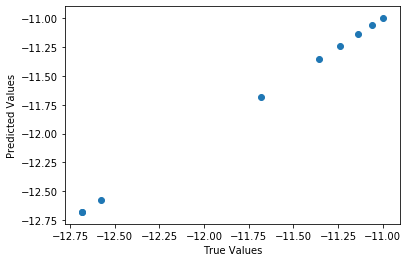

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44],
 <a list of 45 Text xticklabel objects>)

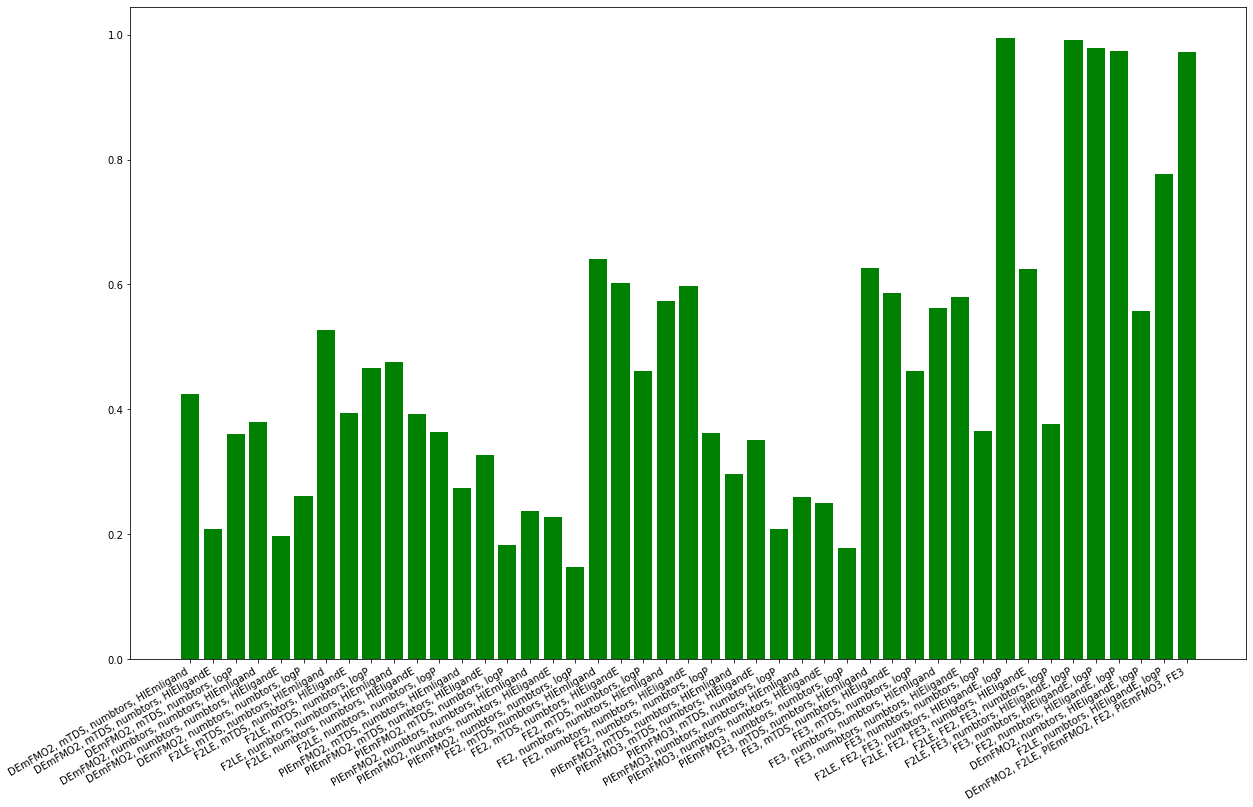

In [4]:

featlist = ['DEmFMO2', 'F2LE', 'PIEmFMO2', 'FE2', 'PIEmFMO3', \
       'FE3', 'mTDS', 'numbtors', 'HIEmligand', 'HIEligandE', 'logP']
label = 'Gexp'
y, ypred, regr, mse, r2 = get_lr_model (featlist, label, df1)
print_and_plot(y, ypred, regr, mse, r2)

msedict = {}
r2dict = {}

set1 = ['DEmFMO2', 'F2LE', 'PIEmFMO2', 'FE2', 'PIEmFMO3', \
       'FE3']
set2 = ['mTDS', 'numbtors']
set3 = ['numbtors']
set4 = ['HIEmligand', 'HIEligandE', 'logP']

for f1 in set1:
    for f2 in set2:
        for f3 in set3:
            for f4 in set4:
              featlist = [f1, f2, f3, f4]
              y, ypred, regr, mse, r2 = get_lr_model (featlist, label, df1)
              xlabel = str(featlist).replace("\'", "").replace("[", "").replace("]", "") 
              msedict[xlabel] = mse
              r2dict[xlabel] = r2
              #print("%60s %10.5f %10.5f"%(xlabel, mse, r2))

fullfeatlis = [['F2LE', 'FE2', 'FE3', 'numbtors', 'HIEligandE', 'logP'], \
               ['F2LE', 'FE2', 'FE3', 'numbtors', 'HIEligandE'], \
               ['F2LE', 'FE2', 'FE3', 'numbtors', 'logP'], \
               ['F2LE', 'FE3', 'numbtors', 'HIEligandE', 'logP'], \
               ['FE3', 'numbtors', 'HIEligandE', 'logP'], \
               ['FE2', 'numbtors', 'HIEligandE', 'logP'], \
               ['DEmFMO2', 'numbtors', 'HIEligandE', 'logP'], \
               ['F2LE', 'numbtors', 'HIEligandE', 'logP'], \
               ['DEmFMO2', 'F2LE', 'PIEmFMO2', 'FE2', 'PIEmFMO3', 'FE3']]

for featlist in fullfeatlis:
    y, ypred, regr, mse, r2 = get_lr_model (featlist, label, df1)
    xlabel = str(featlist).replace("\'", "").replace("[", "").replace("]", "") 
    msedict[xlabel] = mse
    r2dict[xlabel] = r2

fig, ax = pyplot.subplots(figsize=(20,12))
ax.bar(r2dict.keys(), r2dict.values(), color='g')
pyplot.xticks(rotation=30, ha='right')

In [5]:
# calculate the correlation matrix
corr = df2.corr()

cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '100px', 'font-size': '12pt'})\
    .set_caption("Correlation")\
    .set_precision(2)\
    .set_table_styles(magnify())

,Gexp,DG,LE,HIEmligand,logP
Gexp,1.00,0.68,0.60,0.41,0.21
DG,0.68,1.00,0.99,0.41,-0.28
LE,0.60,0.99,1.00,0.42,-0.37
HIEmligand,0.41,0.41,0.42,1.00,-0.03
logP,0.21,-0.28,-0.37,-0.03,1.00


Intercept: 
 -10.057146761809015
Coeff         DG     0.1033 
Coeff         LE    -2.1811 
Coeff HIEmligand     0.0306 
Coeff       logP     0.2473 
MSE:    0.11442 R2:    0.75704


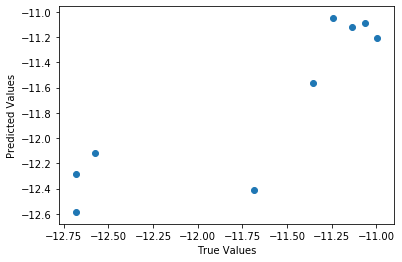

([0, 1, 2, 3, 4, 5], <a list of 6 Text xticklabel objects>)

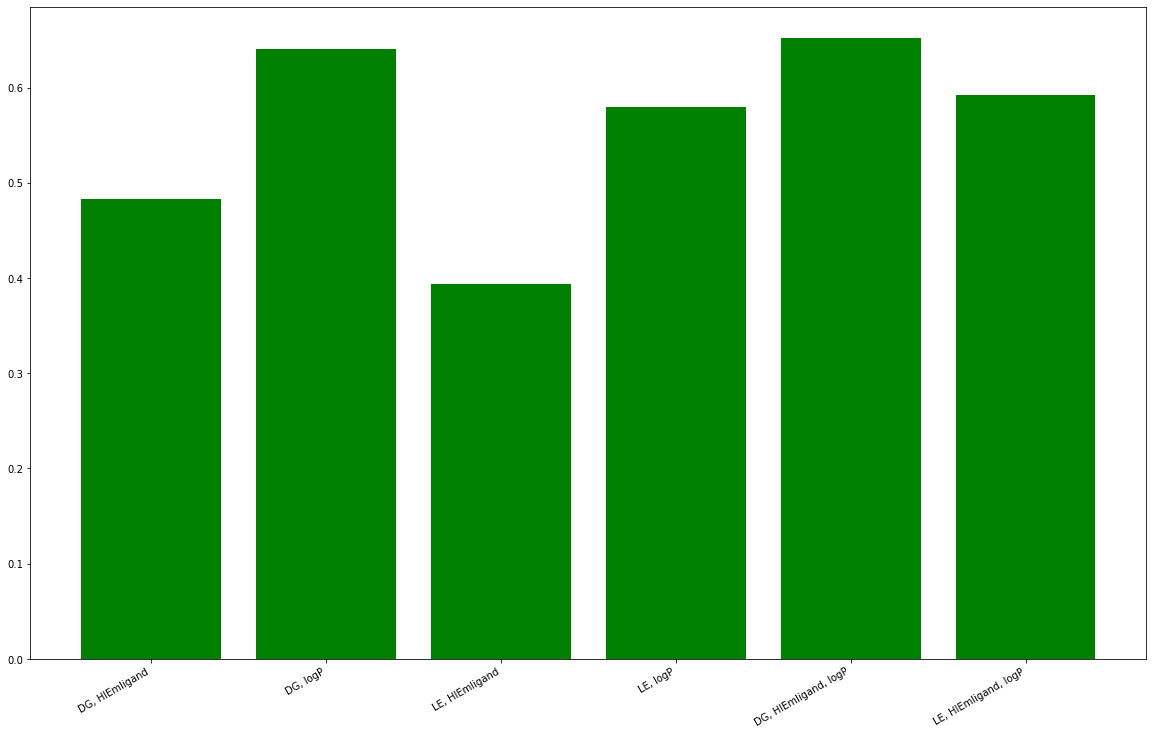

In [6]:
featlist = ['DG', 'LE', 'HIEmligand', 'logP']
label = 'Gexp'
y, ypred, regr, mse, r2 = get_lr_model (featlist, label, df2)
print_and_plot(y, ypred, regr, mse, r2)

msedict = {}
r2dict = {}

set1 = ['DG', 'LE']
set2 = ['HIEmligand', 'logP']

for f1 in set1:
    for f2 in set2:
        featlist = [f1, f2]
        y, ypred, regr, mse, r2 = get_lr_model (featlist, label, df2)
        xlabel = str(featlist).replace("\'", "").replace("[", "").replace("]", "") 
        msedict[xlabel] = mse
        r2dict[xlabel] = r2
        #print("%60s %10.5f %10.5f"%(xlabel, mse, r2))

fullfeatlis = [['DG', 'HIEmligand', 'logP'], \
               ['LE', 'HIEmligand', 'logP']]

for featlist in fullfeatlis:
    y, ypred, regr, mse, r2 = get_lr_model (featlist, label, df2)
    xlabel = str(featlist).replace("\'", "").replace("[", "").replace("]", "") 
    msedict[xlabel] = mse
    r2dict[xlabel] = r2

fig, ax = pyplot.subplots(figsize=(20,12))
ax.bar(r2dict.keys(), r2dict.values(), color='g')
pyplot.xticks(rotation=30, ha='right')